Generating Particles
====================


In [10]:
%pylab
%matplotlib inline
import numpy as np

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


To generate the correct particle distribution for a given $\rho(r, \theta, z)$, we must first generate distributions. Here we will assume they are separable and use a guess.
$$
\rho(r, \theta, z) = \rho_0R(r)\Theta(\theta)Z(z)~.
$$
Henceforth we will assume that
$$
R(r) = e^{-\frac{r}{h}}~,
$$
with $h$ some scale height,
$$
\Theta(\theta) = 1~,
$$
i.e. that it is uniform, and
$$
Z(z) = \rm{sech}^2\left(\frac{z}{z_0}\right)~,
$$
again with $z_0$ some scale height.

First we must find the correct normalization constants such that the above can be turned into probability distributions,
$$
p(r) = \frac{R(r)}{h}~,
$$
$$
p(\theta) = \frac{1}{2\pi}H(2\pi)~,
$$
$$
p(z) = \frac{Z(z)}{2z_0}~.
$$
These probability distributions can be integrated between their lower limit ($k$) and some variable to generate a cumulative distribution function,
$$
P(x) = \int^x_k p(x) \cdot \rm{d}x~.
$$
The CDFs are as follows (except the trivial one)
$$
P(r) = 1-e^{-\frac{r}{h}}~,
$$
$$
P(z) = \frac{1}{2}\left[\rm{tanh}\left(\frac{z}{z_0}\right) + 1 \right]~.
$$

Now, what is very easy to do is to generate uniform random numbers. We can do that with ```random.random()``` -- what is difficult is to make them fit the distribution you want. We can do that here by inverting the CDFs (given above) such that our distributions:
$$
r = -h\ln(1- U(0, 1))~,
$$
$$
\theta = 2\pi U(0, 1)~,
$$
$$
z = z_0 \mathrm{tanh}^{-1}(2U(0,1) - 1)~.
$$

These are implemented below:

In [11]:
def r(x, h=1):
    return -h*np.log(1-x)

In [12]:
def theta(x):
    return 2*np.pi*x

In [13]:
def z(x, z0=0.5):
    return z0*np.arctanh(2*x-1)

Let's give these distributions a test run:

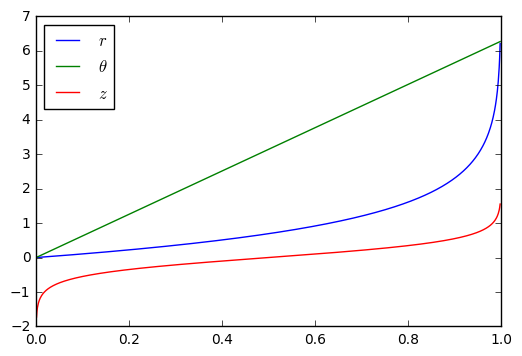

In [14]:
x = np.arange(0.001, 0.999, 0.001)
plot(x, r(x), label=r"$r$")
plot(x, theta(x), label=r"$\theta$")
plot(x, z(x), label=r"$z$")
legend(loc='best')

Now, let's generate a bunch of random data, and zip it up to be co-ordinates:

In [15]:
n=1000
data = array((r(random.random(n)), theta(random.random(n)), z(random.random(n)))).T

In [16]:
def convert_to_cart(data):
    out = empty_like(data)
    out[:, 0] = data[:, 0]*cos(data[:, 1])  # x = rcos0
    out[:, 1] = data[:, 0]*sin(data[:, 1])  # y = rsin0
    out[:, 2] = data[:, 2]  # z = z
    
    return out

In [17]:
cd = convert_to_cart(data)

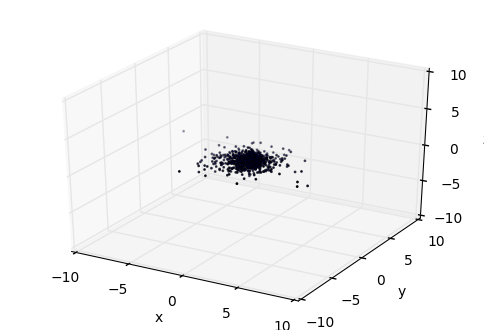

In [18]:
from mpl_toolkits.mplot3d import axes3d
fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-10, 10))
ax.scatter(cd[:, 0], cd[:, 1], cd[:, 2], s=1)

Velocities
----------

$\rho$ doesn't really matter - we can just set this through the individual particle masses. The next bit is giving each particle a velocity based on the NFW profile.